# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [129]:
import pandas as pd
import numpy as np

In [218]:
pd.options.display.max_rows=50

## Read in the file `craftcans.csv`, and look at the first first rows

In [130]:
df=pd.read_csv('/Users/masashi-ijichi/Downloads/07-homework-updated/01-beer/craftcans.csv',na_values=[0])
df.iloc[:1]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50


## How many rows do you have in the data? What are the column types?

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.2+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [132]:
df.groupby('Brewery')['Beer'].count().reset_index().sort_values('Beer',ascending=False).head(10)

,Brewery,Beer
94,Brewery Vivant,62
367,Oskar Blues Brewery,46
466,Sun King Brewing Company,38
133,Cigar City Brewing Company,25
437,Sixpoint Craft Ales,24
255,Hopworks Urban Brewery,23
459,Stevens Point Brewery,22
3,21st Amendment Brewery,20
225,Great Crescent Brewery,20
81,Bonfire Brewing Company,19


## What is the most common ABV? (alcohol by volume)

In [133]:
df['ABV'].value_counts().index[0]

'5.00%'

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [219]:
df['ABV']

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [135]:
df['ABV']=df['ABV'].str.replace('%','')

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [136]:
df['ABV']=df['ABV'].astype(float)

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [137]:
df['ABV'].median()

5.6

In [138]:
df['ABV'].mean()

5.977342419080068

<AxesSubplot:>

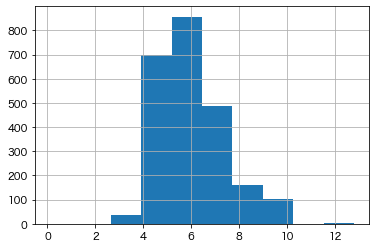

In [139]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [140]:
df['ABV'].isnull().count()

2416

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [141]:
df.groupby('Location')['Beer'].count().reset_index().sort_values('Beer',ascending=False).head(10)

,Location,Beer
141,"Grand Rapids, MI",66
73,"Chicago, IL",55
293,"Portland, OR",52
166,"Indianapolis, IN",43
313,"San Diego, CA",42
47,"Boulder, CO",41
96,"Denver, CO",40
55,"Brooklyn, NY",38
320,"Seattle, WA",35
206,"Longmont, CO",33


## List all of the beer from Brooklyn, NY

In [142]:
df[df['Location']=='Brooklyn, NY']['Beer'].tolist()

['4Beans',
 'Jammer',
 'Abigale',
 'Nomader Weiss',
 'Rad',
 'Molotov Lite',
 'Bengali',
 'Sensi Harvest',
 'Hi-Res',
 'KelSo Nut Brown Lager',
 'Global Warmer',
 'Autumnation (2013)',
 'KelSo India Pale Ale',
 'The Crisp',
 'Sweet Action',
 'Righteous Ale',
 'Bengali Tiger',
 'KelSo Pilsner',
 'Hipster Ale (Two Roads Brewing)',
 'Bikini Beer',
 'East India Pale Ale',
 '3Beans',
 'Brownstone',
 'Brooklyn Summer Ale',
 'Hipster Ale (Westbrook Brewing)',
 'Apollo',
 'Harbinger',
 'Resin',
 'East India Pale Ale',
 'Diesel',
 'Autumnation (2011-12) (2011)',
 'The Crisp (2011)',
 'Sweet Action (2011)',
 'Righteous Ale (2011)',
 'Bengali Tiger (2011)',
 'Brooklyn Summer Ale (2011)',
 'Brooklyn Lager (16 oz.)',
 'Brooklyn Lager (12 oz.)']

## What brewery in Brooklyn puts out the most different cans of beer?

In [220]:
brdf=df[df['Location']=='Brooklyn, NY']
brdf

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52,NY
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16,NY
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply,NY
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply,NY
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7,NY
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply,NY
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62,NY
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50,NY
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111,NY
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19,NY


In [144]:
brdf.groupby('Brewery')['Beer'].count().sort_values(ascending=False)

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [145]:
sixbrdf=brdf[brdf['Brewery']=='Sixpoint Craft Ales']
sixbrdf.groupby('Style')['Beer'].count().sort_values(ascending=False)

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Rye Beer                          2
American Brown Ale                1
American Pale Ale (APA)           1
American Pale Wheat Ale           1
American Stout                    1
American Strong Ale               1
Belgian Pale Ale                  1
Fruit / Vegetable Beer            1
Gose                              1
Pumpkin Ale                       1
Saison / Farmhouse Ale            1
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [221]:
df['Location']

0       Minneapolis, MN
1       Minneapolis, MN
2       Minneapolis, MN
3       Minneapolis, MN
4       Minneapolis, MN
             ...       
2411       Longmont, CO
2412       Longmont, CO
2413       Longmont, CO
2414       Longmont, CO
2415       Longmont, CO
Name: Location, Length: 2416, dtype: object

### Now *count* all of the breweries in New York state

In [147]:
df['state']=df['Location'].str.extract(r',\s([A-Z]{2})')

In [222]:
df[df['Location'].str.contains('NY',na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52,NY
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16,NY
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply,NY
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply,NY
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7,NY
...,...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply,NY
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply,NY
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply,NY
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply,NY


In [149]:
len(df[df['state']=='NY']['Brewery'].unique())

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [211]:
pd.options.display.max_rows = 10000
df=df[~df.isna()]

In [223]:
df[df['Style'].str.contains('IPA',na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65,KY
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100,CA
...,...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120,MN
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99,MN
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65,CA
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100,CO


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [152]:
dfibu.IBUs.unique()

array(['50', '26', '19', '38', '25', '47', '68', '80', '42', '21', '13',
       '17', '65', '20', '18', '15', '45', '100', '85', '24', '30', '28',
       '16', '75', '35', '54', '12', '10', '40', '72', '90', '46', '64',
       '31', '37', '27', '58', '29', '23', '22', '11', '60', '8', '34',
       '52', '70', '51', '44', '33', '5', '82', '115', '69', '55', '63',
       '67', '93', '66', '126', '61', '36', '87', '88', '103', '6', '9',
       '14', '49', '32', '89', '43', '71', '7', '73', '41', '53', '62',
       '77', '86', '118', '81', '130', '99', '76', '48', '39', '83',
       '108', '74', '104', '110', '111', '135', '95', '92', '78', '101',
       '94', '98', '57', '4', '120', '138', '105', '91', '97', '113'],
      dtype=object)

In [158]:
dfibu=df[df['IBUs']!="Does not apply"]

In [159]:
dfibu=dfibu[dfibu['IBUs'].notna()]

In [160]:
round(dfibu['IBUs'].astype(int).mean(),1)

42.7

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

In [161]:
round(dfibu['IBUs'].astype(int).mean(),1)

42.7

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [168]:
dfibu['IBUs']=dfibu['IBUs'].astype(int)

In [224]:
dfibu[dfibu['IBUs']>dfibu['IBUs'].quantile([0.25, 0.50, 0.75])[0.75]]['Beer']

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 346, dtype: object

## List all of the beers with IBUs below the 25th percentile

In [225]:
dfibu[dfibu['IBUs']<dfibu['IBUs'].quantile([0.25, 0.50, 0.75])[0.25]]['Beer']

2                          Wall's End
12                           Sho'nuff
13                        Bloody Show
18                     The Brown Note
19                        House Lager
                    ...              
2372                 Bombshell Blonde
2385              Bikini Blonde Lager
2396                 Royal Weisse Ale
2404                             Hell
2409    Hell or High Watermelon Wheat
Name: Beer, Length: 338, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<AxesSubplot:xlabel='Brewery'>

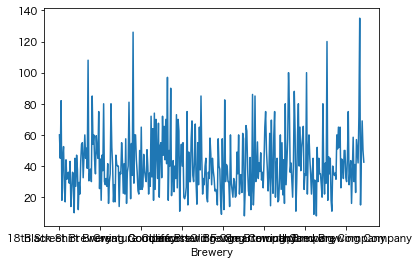

In [180]:
dfibu.groupby('Brewery')['IBUs'].median().plot()

In [ ]:

dfibu.groupby('Style')['Beer'].coount()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [185]:
low=dfibu[dfibu['IBUs']<dfibu['IBUs'].quantile([0.25, 0.50, 0.75])[0.25]]

In [186]:
high=dfibu[dfibu['IBUs']>dfibu['IBUs'].quantile([0.25, 0.50, 0.75])[0.75]]

In [190]:
low.groupby('Style')['Beer'].count().sort_values(ascending=False).head(5)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Beer, dtype: int64

In [191]:
high.groupby('Style')['Beer'].count().sort_values(ascending=False).head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [195]:
dfibu[dfibu['Style'].isin(['Witbier'])]['IBUs'].mean()

16.208333333333332

In [196]:
dfibu[dfibu['Style'].isin(['Hefeweizen'])]['IBUs'].mean()

17.59259259259259

In [197]:
dfibu[dfibu['Style'].isin(['American Pale Wheat Ale'])]['IBUs'].mean()

20.688524590163933

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

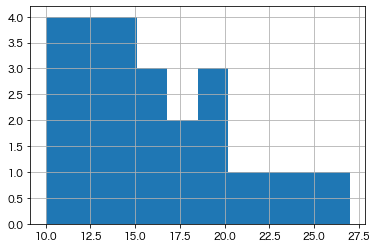

In [198]:
dfibu[dfibu['Style'].isin(['Witbier'])]['IBUs'].hist()

<AxesSubplot:>

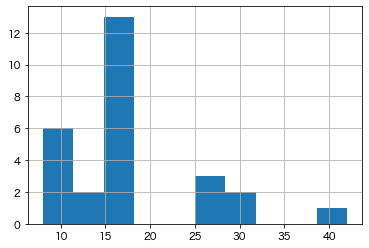

In [199]:
dfibu[dfibu['Style'].isin(['Hefeweizen'])]['IBUs'].hist()

<AxesSubplot:>

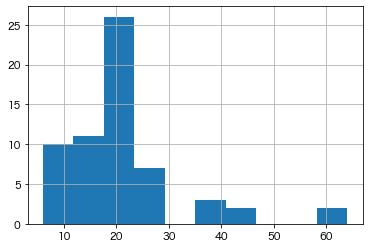

In [200]:
dfibu[dfibu['Style'].isin(['American Pale Wheat Ale'])]['IBUs'].hist()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [230]:
dfibu[dfibu['Style'].str.contains('IPA',na=False)]['IBUs'].mean()

71.94897959183673

<AxesSubplot:>

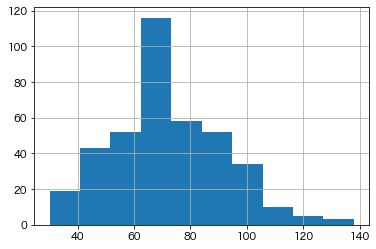

In [231]:
dfibu[dfibu['Style'].str.contains('IPA',na=False)]['IBUs'].hist()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<AxesSubplot:>

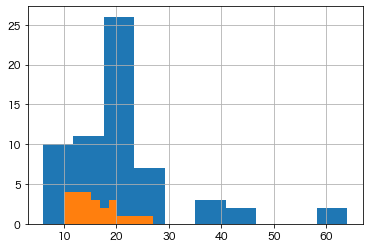

In [232]:
dfibu[dfibu['Style'].isin(['American Pale Wheat Ale'])]['IBUs'].hist()
dfibu[dfibu['Style'].isin(['Witbier'])]['IBUs'].hist()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [239]:
wheat_beer=['Witbier','Hefeweizen']

In [241]:
dfwheat=df[df['Style'].isin(wheat_beer)]

In [251]:
dfwheat=pd.concat([df[df['Style'].str.contains('wheat',case=False,na=False)],dfwheat])

In [253]:
dfipa=df[df['Style'].str.contains('ipa',case=False,na=False)]

In [254]:
dfipa['ABV'].mean()

6.879285714285714

In [255]:
dfwheat['ABV'].mean()

5.054736842105264

## Good work!